
# Анализ данных с Python


Ориентировочное время необходимо: ** 30 ** минут
    

## Цели

После завершения этой лаборатории вы сможете:

* Исследуйте функции или шариктеристики для прогнозирования цены на автомобиль


<h2> Соблюдение </h2>

<div class = "оповещение о блоке Alert-info" style = "margin-top: 20px">
<ol>
    <li> <a href="#import_data"> импорт данных из модуля </a> </li>
    <li> <a href="#pattern_visualization"> Анализ индивидуальных шаблонов функций с использованием визуализации </a> </li>
    <li> <a href="#discriptive_statistics"> Описательный статистический анализ </a> </li>
    <li> <a href="#basic_grouping"> Основы группировки </a> </li>
    <li> <a href="#correlation_causation"> Корреляция и причинно -следственная связь </a> </li>
    <li> <a href="#anova"> anova </a> </li>
</ol>

</div>
 
<hr>


<h3> Каковы основные характеристики, которые оказывают наибольшее влияние на цену автомобиля? </h3>


<h2 id = "import_data"> 1.Импорт данных из модуля 2 </h2>


<h4> НАСТРОЙКИ </h4>


Импорт библиотеки:

In [2]:
import pandas as pd
import numpy as np

Загрузите данные и сохраните их в DataFrame  с помощью метода чтения ссв файлов в переменную `df`:


Этот набор данных был размещен на облачном объекте IBM.Нажмите <a href="https://cocl.us/da101en_object_storage"> здесь </a> для бесплатного хранения.


In [5]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
filename="auto.csv"
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## **Параметры автомобилей**
марка автомобиля **(Make)**

аспирация **(aspiration)**

количество дверей **(num-of-doors)**

стиль кузова **(body-style)**

ведущие колеса	**(drive-wheels)**

расположение двигателя (**engine-location)**

колёсная база 	**(wheel-base)**

длина автомобиля **(length)**

степень сжатия	двигателя **(compression-ratio)**

лошадиная сила автомобиля	**(horsepower)**

пиковые обороты	**(peak-rpm)**

расход галлонов топлива на милю по городу	**(city-mpg)**

расход галлонов топлива на милю по шоссе	**(highway-mpg)**

цена автомобиля	**(price)**

мощность в лошадиных силах	**(horsepower-binned)** что то типа рейтинга, в градация мало, много, средне, относительно количественного показателя выборки в столбце лошадиные силы

дизель	**(diesel)** - дизельный автомобиль

газ **(gas)** - автомобиль на газу 

<h2 id = "pattern_visualization"> 2.Анализ отдельных шаблонов функций с использованием визуализации </h2>


Чтобы установить Seaborn, мы используем PIP, менеджер пакетов Python.


Импортные пакеты визуализации "matplotlib" и "Seaborn".Не забывайте о том, что «%матплотлиб встроен», чтобы он построить в ноутбуке Юпитера.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

<h4> Как выбрать правильный метод визуализации? </h4>
<p> При визуализации отдельных переменных важно сначала понять, с какой типом переменной я имею дело. Это поможет нам найти правильный метод визуализации для этой переменной. Понять она качественная или количественная </P>

In [27]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h3> Вопрос № 1: </h3>

<b> Каков тип данных столбца «пиковые обороты **(peak-rpm)**»?</b>
</div>

In [30]:
# Write your code below and press Shift+Enter to execute 
df['peak-rpm'].dtypes

dtype('float64')

мы можем рассчитать корреляцию между переменными типа «int64» или «float64», используя метод «corr»:
Применим метод corr  и выведем все на экран



In [15]:
df.corr()

C:\Users\admin\AppData\Local\Temp/ipykernel_8468/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


по оси х и по оси н расположены наименования столбцов, бля понимания зависимостей
**определим корреляцию, более точно, корреляцией Пирсона**


<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h3> Вопрос № 2: </h3>

<p> Найдите корреляцию между следующими столбцами: bore (отверстие цилиндра), stroke(ход), сжатие(compression-ratio) и мощность (horsepower). </p>
<p> Для выборать эти столбцов, использую следующий синтаксис: df [['bore', 'ход', 'сжатие-Ratio', 'лошадиные силы']].далее применяется метод </p>
</div>

In [36]:
# Write your code below and press Shift+Enter to execute 
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()


,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2> непрерывные числовые переменные: </h2>

<p> Непрерывные числовые переменные - это переменные, которые могут содержать любое значение в некотором диапазоне.Они могут быть типа «int64» или «float64».Отличный способ визуализации этих переменных - это использование рассеянных диаграмм с установленными линиями. </P>

<p> Чтобы начать понимание (линейной) взаимосвязи между отдельной переменной и цены, мы можем использовать «Регулирование», которая располагает графиком рассеяния плюс установленная линия регрессии для данных.Позже это будет полезно для визуализации соответствия простой модели линейной регрессии.</p>


Посмотрим несколько примеров различных линейных отношений:


<h3>Positive Linear Relationship</h4>


Давайте найдем диаграмму рассеяния «размер двигателя» и «цены».
библиотека SEaborn импортирована как SNS
 ### sns.тип_графика (x ='столбец1', y= 'столбец2', data = df)


(0.0, 53775.372498691635)

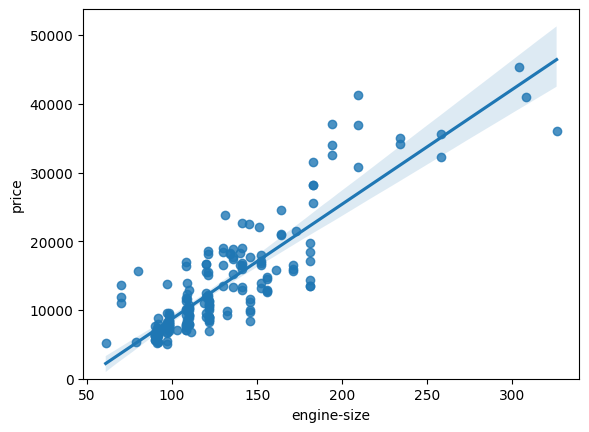

In [38]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

 По мере увеличения размера двигателя цена возрастает: это указывает на положительную прямую корреляцию между этими двумя переменными.
#### Размер двигателя кажется довольно хорошим предиктором (предсказывающим показателем) цены, поскольку линия регрессии почти идеальная диагональная линия. 


Мы можем исследовать корреляцию между «размером с двигателя» и «ценой» и увидим, что она составляет приблизительно 0,87.

**df[['column1', 'column2']].metod_name()**


In [39]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Шоссе миль на галлон является потенциальной переменной цены предиктора.Давайте найдем диаграмму рассеяния "шоссе-MPG" и "Price".
 ### sns.тип_графика (x ='столбец1', y= 'столбец2', data = df)


<Axes: xlabel='highway-mpg', ylabel='price'>

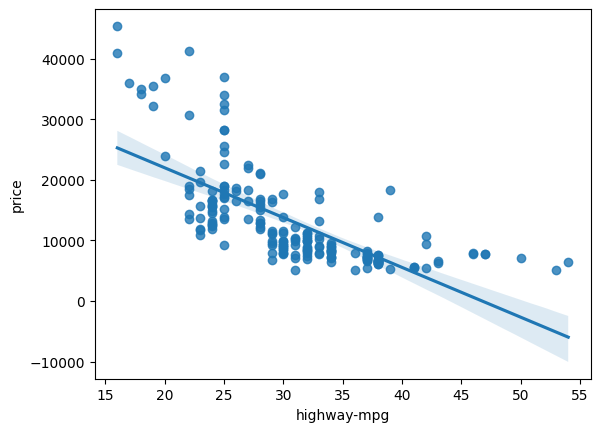

In [40]:
sns.regplot(x="highway-mpg", y="price", data=df)

По мере роста расхода топлива на шоссе за километр (милю или другую меру расстояния) цена снижается: это указывает на обратную/отрицательную связь между этими двумя переменными.оценка расхода топлива на милю может быть предиктором цены.  НАПРИМЕР: **ЧЕМ меньше расходует машина тем выше ее цена** 

Мы можем исследовать корреляцию между «галлон на милю по шоссе и «Price» и увидеть, что она составляет приблизительно -0,704.

**df[['column1', 'column2']].metod_name()**

In [41]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<h3>Weak Linear Relationship</h3>


Давайте посмотрим, является ли «пиковые обороты» переменной предиктора «цены».
 ### sns.тип_графика (x ='столбец1', y= 'столбец2', data = df)


<Axes: xlabel='peak-rpm', ylabel='price'>

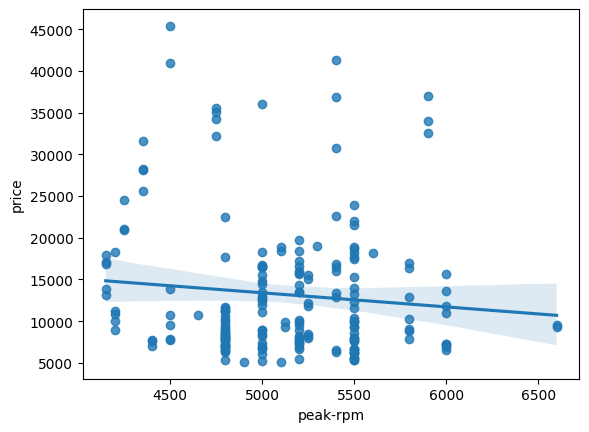

In [42]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p> Пик RPM не кажется хорошим предиктором цены вообще, поскольку линия регрессии близка к горизонтали.Кроме того, точки данных очень разбросаны и далеки от установленной линии, показывая много изменчивости.Следовательно, это не надежная переменная. </P>

Мы можем исследовать корреляцию между «пиковым RPM» и «ценой» и увидеть, что она составляет приблизительно -0,101616.
**df[['column1', 'column2']].metod_name()**


In [43]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос 3 </h1>

<p> Найдите корреляцию между x = "ход" и y = "цена". </p>
<p> Подсказка: если вы хотите выбрать эти столбцы, используйте следующий синтаксис: 


**df [["column1", "column2"]].metod_name()**
</div>

In [44]:
# Write your code below and press Shift+Enter to execute
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос 3  </h1>

<p> Учитывая результаты корреляции между «ценой» и "ходом", вы ожидаете линейных отношений? </p>
<p> Проверьте свои результаты, используя функцию «regplot ()». </p>
</div>

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


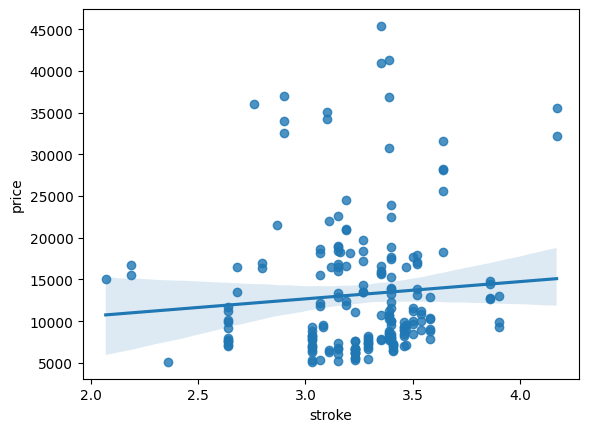

In [46]:
# Write your code below and press Shift+Enter to execute 
sns.regplot(x = 'stroke', y ='price', data = df)
df[['stroke','price']].corr()

Вывод из сравнения: корреляции не существует. для текущего анализа и выводу относительно целевой переменной (цены) эта переменная не имеет. 

## категориальные переменные

<p> Это переменные, которые описывают «характеристику» блока данных и выбираются из небольшой группы категорий.Категориальные переменные могут иметь тип «объект» или «int64».Хороший способ визуализации категориальных переменных - это использование боксов. </P>


Давайте посмотрим на отношения между «стилем тела» и «ценой».
стилей тела у нас несколько. посмотрм какие самые дорогие , какие разбежки цен

 ### sns.тип_графика (x ='столбец1', y= 'столбец2', data = df)


<Axes: xlabel='body-style', ylabel='price'>

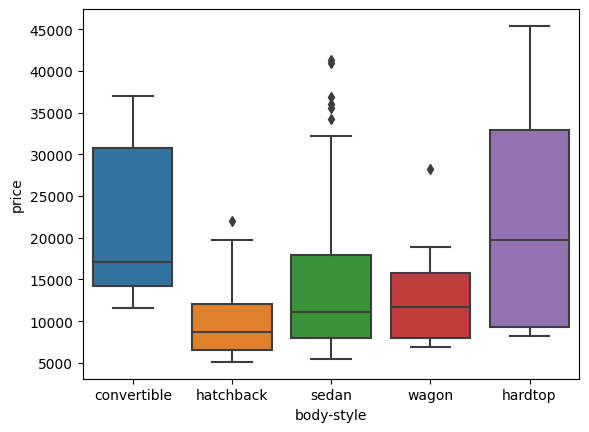

In [47]:
sns.boxplot(x="body-style", y="price", data=df)

<p> Мы видим, что распределение цен между различными категориями в стиле тела имеет значительное совпадение, поэтому стиль тела не будет хорошим предиктором цены. Единственное, хардтопы  и кабриолеты имеют самую высокую цену.

Давайте рассмотрим двигатель «локация двигателя» и «Цена»: </p>

<Axes: xlabel='engine-location', ylabel='price'>

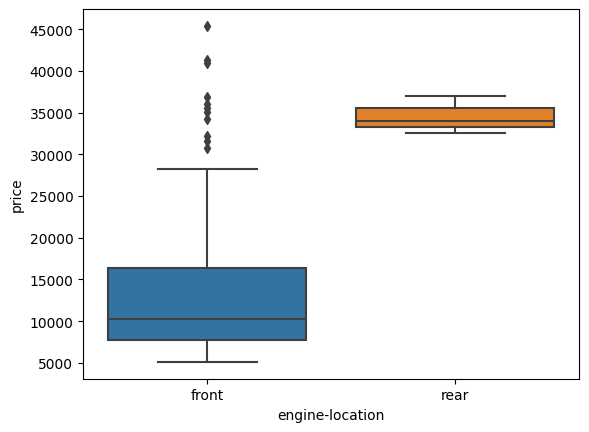

In [48]:
sns.boxplot(x="engine-location", y="price", data=df)

<p> Здесь мы видим, что распределение цены между этими двумя категориями моторного размещения, спереди и сзади, достаточно различны, чтобы взять на себя размещение двигателя в качестве потенциального хорошего предиктора цены.  но теперь я знаю что все автомобили с двигателем сзади стоят дороже, а точнее начало их ценовой категории лежит в за пределами максимальных значений переднедвигательных машин</p>

Давайте рассмотрим «приводные колеса» и «цена».


<Axes: xlabel='drive-wheels', ylabel='price'>

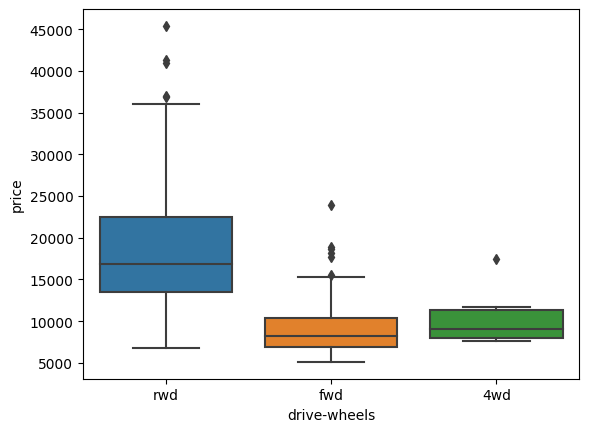

In [49]:
# Drive-Weels
sns.boxplot(x="drive-wheels", y="price", data=df)

**Здесь мы видим, что распределение цены между различными категориями дисководов отличается.**

**Таким образом, ведущие колеса могут потенциально быть предиктором цены.**


<h2 id = "disciptive_statistics"> 3.Описательный статистический анализ </h2>

<p> Давайте сначала посмотрим на переменные, используя метод описания. df.describe() </p>

<p> Функция <b> описать </b> автоматически вычисляет основную статистику для всех непрерывных переменных.Любые значения NAN автоматически пропускаются в этой статистике. </P>

Это покажет:
<ul>
    <li> Подсчет этой переменной </li>
    <li> Среднее </li>
    <li> Стандартное отклонение (Std) </li>
    <li> Минимальное значение </li>
    <li> IQR (межквартильный диапазон: 25%, 50%и 75%) </li>
    <li> Максимальное значение </li>
<ul>

Мы можем применить метод «describe» следующим образом:


In [50]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Настройка по умолчанию"describe" Пропускает переменные объекта типа.Мы можем применить метод "describe" о переменных типа «объект» следующим образом:


In [51]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


При описании категориальных переменных мыф видим, что есть 22 уникальные марки авто в выборке. Самая популярная это тойота
есть 5 стилей кузовов
есть 6 размеров двигателей
7 разных количеств цииндров 
8 различгных типов систем распределения топлива
так же топовые характеристики(самые часто встречающиеся в каждой категории и как часто они встренчаются)

<h3>Value Counts</h3>


<p> Подсчет значений - хороший способ понять, сколько единиц каждой характеристики/переменной у нас.Мы можем применить метод «value_counts» на столбце «Drive-Weels».Не забывайте метод «value_counts» работает только в серии Pandas, а не Pandas DataFrames.В результате мы включаем только один кронштейн <code> df ['Drive-Wheels'] </code>, а не два кронштейна <code> df [['Drive-Wheels']] </code>. </P>


In [52]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Мы можем преобразовать серию в DataFrame следующим образом:


In [53]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Давайте повторим приведенные выше шаги, но сохраните результаты в DataFrame "Drive_wheels_counts" и переименованы столбцом "Drive-Weels" до 'value_counts'.


In [54]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


Теперь давайте переименовать индекс в «колеса»:


In [55]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Мы можем повторить приведенный выше процесс для переменной «расположение двигателя».


In [56]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


**После изучения количества значений местоположения двигателя мы видим, что расположение двигателя не будет хорошей переменной предиктора по цене.Это потому, что у нас есть только три автомобиля с задним двигателем и 198 с двигателем спереди, так что этот результат искажен.Таким образом, мы не можем сделать никаких выводов о расположении двигателя.** </P>** мы подтвердили предыдущий боксплот. у нас не хватает данных по ценам  редких расположений двигателя

<h2 id = "basic_grouping"> 4.Основы группировки </h2>


<p> Группы методов "GroupBy" по разным категориям.Данные сгруппированы на основе одной или нескольких переменных, а анализ проводится на отдельных группах. </P>

<p> Например, давайте группируем с переменной "ведущие колеса" . Мы видим, что есть 3 разные категории дисководов. </P>

In [57]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p> Если мы хотим в среднем знать, какой тип приводного колеса наиболее ценен, мы можем группировать «приводные колеса», а затем ввычислить среднюю цену каждой категории </p>

<p> Мы можем выбрать столбцы «дисководы», «стиль тела» и «цена», а затем назначить их переменной "df_group_one". </p>

In [60]:
df_group_one = df[['drive-wheels','body-style','price']]

Затем мы можем рассчитать среднюю цену для каждой из различных категорий данных.

In [61]:
# сгруппируем и получим среднюю цену каждой категории
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

C:\Users\admin\AppData\Local\Temp/ipykernel_18104/1990336142.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p> Из наших данных кажется, что транспортные средства для заднего привода в среднем являются самыми дорогими, а 4-х колеса и переднее колесо примерно одинаковы по цене. </p>

<p> Вы также можете группировать по нескольким переменным.Например, Let's Group от «Drive-Weels» и «Body Style».Это группирует DataFrame с помощью уникальной комбинации «типа ведущих колес» и «кузова». Мы можем сохранить результаты в переменной 'Grupered_test1'. </P>


In [62]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p> Эти сгруппированные данные намного проще визуализировать, когда они превращаются в поворот.Таблица поворота похожа на электронную таблицу Excel, с одной переменной вдоль столбца и другой вдоль строки.Мы можем преобразовать DataFrame в таблицу поворота, используя метод «Pivot», чтобы создать поворотную таблицу из групп. </P>.

<p> В этом случае мы оставим переменную приводной колеса в качестве рядов таблицы, и стиль поворота, чтобы стать столбцами таблицы: </p>


In [63]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p> Часто у нас не будет данных для некоторых поворотных ячеек.Мы можем заполнить эти пропущенные ячейки значением 0, но любое другое значение также может быть использовано.Следует отметить, что отсутствующие данные являются довольно сложным предметом и являются целым курсом самостоятельно. </P>


In [64]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос 4: </h1>

<p> Используйте функцию «GroupBy», чтобы найти среднюю «цену» каждого автомобиля на основе «стиля кузова». </p>
</div>


In [66]:
# Write your code below and press Shift+Enter to execute 
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Если вы не импортировали «pyplot», давайте сделаем это снова.


In [67]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4> Переменные: диски и стиль кузова против ценой </h4>


Давайте используем тепловую карту, чтобы визуализировать взаимосвязь между стилем кузова и ценой.


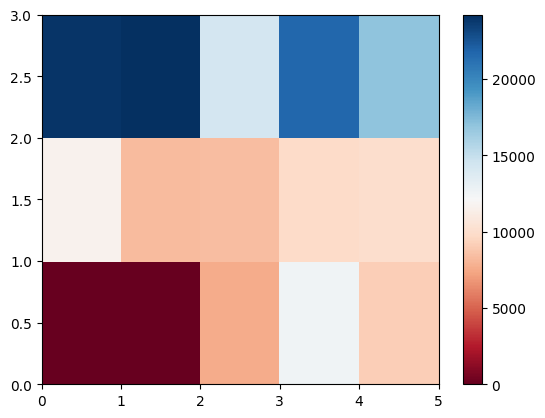

In [71]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()


<p> Тепловая карта определяет целевую переменную (цену), пропорциональную цвету по отношению к переменным «приводное колесо» и «стиль тела» по вертикальной и горизонтальной оси, соответственно.Это позволяет нам визуализировать, как цена связана с «приводным колесом» и «в стиле тела». </P>

<p> Метки по умолчанию не дают нам полезной информации.Давайте изменим это: </p>


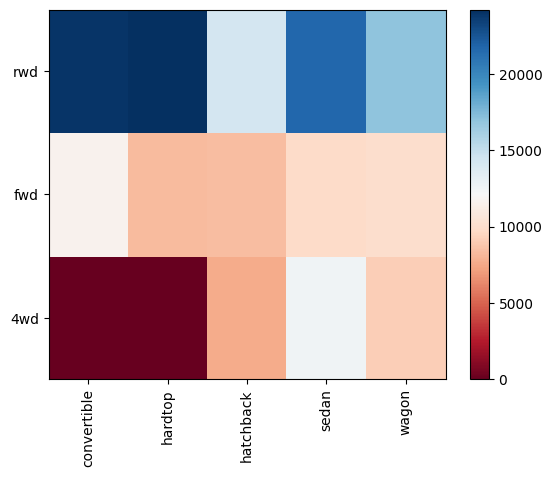

In [72]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p> Визуализация очень важна в науке о данных, а пакеты визуализации Python обеспечивают большую свободу.Мы пойдем более подробно в отдельном курсе визуализации Python. </P>

<p> Основной вопрос, на который мы хотим ответить в этом модуле: «Каковы основные характеристики, которые оказывают наибольшее влияние на цену автомобиля?». </p>

<p> Чтобы получить лучшую меру важных характеристик, мы смотрим на корреляцию этих переменных с ценой автомобиля.Другими словами: как цена автомобиля зависит от этой переменной? </P>


<h2 id = "correlation_causation"> 5.Корреляция и причинно -следственная связь </h2>


<p> <b> Корреляция </b>: мера степени взаимозависимости между переменными. </p>

<p> <b> причинно -следственная связь </b>: взаимосвязь между причиной и следствием между двумя переменными. </p>

<p> Важно знать разницу между этими двумя.Корреляция не подразумевает причинно -следственную связь.Определение корреляции намного проще. Определяющая причинность как причинно -следственная связь может потребовать независимых экспериментов. </P>


<p> <b> корреляция Пирсона </b> </p>
<p> Корреляция Пирсона измеряет линейную зависимость между двумя переменными x и y. </p>
<p> Полученный коэффициент является значением между -1 и 1 включительно, где: </p>
<ul>
    <li> <b> 1 </b>: идеальная положительная линейная корреляция. </li>
    <li> <b> 0 </b>: нет линейной корреляции, две переменные, скорее всего, не влияют друг на друга. </li>
    <li> <b> -1 </b>: идеальная отрицательная линейная корреляция. </li>
</ul>

<p> Корреляция Пирсона - это метод по умолчанию функции «corr».Как и раньше, мы можем рассчитать корреляцию Пирсона с переменными «int64» или «float64». </P>


In [73]:
df.corr()

C:\Users\admin\AppData\Local\Temp/ipykernel_18104/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Иногда мы хотели бы знать значительную оценку корреляции.


<b> p-value </b>
<p> Что это за значение p?P-значение-это значение вероятности, которое корреляция между этими двумя переменными является статистически значимой.Обычно мы выбираем уровень значимости 0,05, что означает, что мы 95% уверены, что корреляция между переменными является значительной. </P>

По соглашению, когда
<ul>
    <li> p-значение составляет $ <0,001 доллар: мы говорим, что есть убедительные доказательства того, что корреляция значительна. </li>
    <li> P-значение составляет $ <0,05 долл. США: есть умеренные доказательства того, что корреляция значительна. </li>
    <li> P-значение составляет $ <0,1 доллара: есть слабые доказательства того, что корреляция значительна. </li>
    <li> p-значение составляет $> 0,1 $: нет никаких доказательств того, что корреляция значительна. </li>
</ul>


Мы можем получить эту информацию, используя модуль «статистики» в библиотеке "Scipy".

In [78]:

from scipy import stats

<h3> Колесная база против цены </h3>


Давайте рассчитаем коэффициент корреляции Пирсона и p-значение «колеса» и «цена».


In [79]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


<h4> Заключение: </h4>
<p> Поскольку p-значение составляет $ 0,001, корреляция между базой и ценой является статистически значимой, хотя линейная взаимосвязь не чрезвычайно сильна (~ 0,585). </p>


<h3> лошадиные силы против цены </h3>


Давайте рассчитаем коэффициент корреляции Пирсона и p-значение «лошадиных сил» и «цены».


In [80]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428260101e-48


<h4> Заключение: </h4>

<p> Поскольку p-значение составляет $ 0,001, корреляция между мощностью и ценой является статистически значимой, а линейная взаимосвязь довольно сильна (~ 0,809, близко к 1). </p>


<h3> длина против ценой </h3>

Давайте рассчитаем коэффициент корреляции Пирсона и p-значение «длины» и «цены».


In [81]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P =  8.016477466159556e-30


<h4> Заключение: </h4>
<p> Поскольку p-значение составляет $ 0,001, корреляция между длиной и ценой является статистически значимой, а линейная связь умеренно сильна (~ 0,691). </p>


<h3> Ширина против цены </h3>


Давайте рассчитаем коэффициент корреляции Пирсона и p-значение «ширины» и «цена»:


In [82]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522672  with a P-value of P = 9.20033551048217e-38


#### Заключение:

Поскольку p-значение составляет <0,001, корреляция между шириной и ценой является статистически значимой, а линейная взаимосвязь довольно сильна (~ 0,751).


### бордюр против цены


Давайте рассчитаем коэффициент корреляции Пирсона и p-значение «бордюрного веса» и «цена»:


In [83]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


<h4> Заключение: </h4>
<p> Поскольку p-значение составляет $ 0,001, корреляция между бордюром и ценой является статистически значимой, а линейная взаимосвязь довольно сильна (~ 0,834). </p>


<h3> Размер двигателя против цены </h3>

Давайте рассчитаем коэффициент корреляции Пирсона и p-значение «размером с двигателя» и «цена»:

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

<h4> Заключение: </h4>

<p> Поскольку p-значение составляет $ 0,001, корреляция между размером двигателя и ценой является статистически значимой, а линейная взаимосвязь очень сильна (~ 0,872). </p>


<h3> отверстие цилиндра против цены </h3>


Давайте рассчитаем коэффициент корреляции Пирсона и p-значение «отверстия» и «цена»:


In [84]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P =   8.04918948393526e-17


<h4> Заключение: </h4>
<p> Поскольку p-значение составляет $ 0,001, корреляция между отверстием и ценой является статистически значимой, но линейная связь только умеренная (~ 0,521). </p>


Мы можем связать процесс для каждого «City-MPG» и «Highway-MPG»:


<h3>City-mpg vs. Price</h3>


In [85]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


<h4> Заключение: </h4>
<p> Поскольку p-значение составляет $ 0,001, корреляция между City-MPG и ценой является статистически значимой, а коэффициент около -0,687 показывает, что отношения являются отрицательными и умеренно сильными. </p>


<h3> шоссе-mpg против цены </h3>


In [86]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


#### Заключение:
Поскольку p-значение составляет <0,001, корреляция между шоссе-MPG и ценой является статистически значимой, а коэффициент около -0,705 показывает, что отношения являются отрицательными и умеренно сильными.


<h2 id="anova">6. ANOVA</h2>


<H3> ANOVA: анализ дисперсии </h3>
<p> Анализ дисперсии (ANOVA) является статистическим методом, используемым для проверки того, существуют ли существенные различия между средствами двух или более групп.ANOVA возвращает два параметра: </p>

<p> <b> F-test Score </b>: ANOVA предполагает, что средства всех групп одинаковы, рассчитывают, насколько фактические средства отклоняются от предположения, и сообщает о его оценке F-теста.Большая оценка означает, что между средствами существует большая разница. </P>

<p> <b> p-value </b>: p-значение рассказывает, насколько статистически значимым наше расчетное значение. </p>

<p> Если наша ценовая переменная тесно связана с переменной, которую мы анализируем, мы ожидаем, что ANOVA вернет значительный показатель F-теста и небольшое значение p. </p>

<h3> приводные колеса </h3>

<p> Поскольку ANOVA анализирует разницу между различными группами одной и той же переменной, функция GroupBy будет удобна.Поскольку алгоритм ANOVA усредняет данные автоматически, нам не нужно брать среднее значение перед рукой. </P>

<p> Чтобы увидеть, воздействует ли различные типы «ведущих колес» цены, мы сгруппируем данные. </p>


In [87]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [88]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


Мы можем получить значения группы методов, используя метод «get_group».


In [89]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

Мы можем использовать функцию «f_oneway» в модуле «статистика», чтобы получить оценку <b> f-test </b> и <b> p-value </b>.


In [90]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577149576e-23


Это отличный результат с большим показателем F-теста, показывающим сильную корреляцию, и p-значение почти 0 подразумевает почти определенную статистическую значимость.Но означает ли это, что все три протестированные группы все так сильно коррелированы?

Давайте рассмотрим их отдельно.


#### FWD и RWD


In [91]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677366e-23


Давайте рассмотрим другие группы.


#### 4wd and rwd


In [92]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225367


<h4>4wd and fwd</h4>


In [93]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.4162011669784502


Мы замечаем, что ANOVA для категорий `4WD` и` fwd` дает высокое значение p> 0,1, поэтому рассчитанная оценка F-теста не очень статистически значима.Это говорит о том, что мы не можем отвергнуть предположение, что средства этих двух групп одинаковы, или, другими словами, мы не можем заключить разницу в корреляции, чтобы быть значительной.


<h3> Заключение: важные переменные </h3>


<p> Теперь у нас есть лучшее представление о том, как выглядят наши данные и какие переменные важны для учета при прогнозировании цены на автомобиль.Мы сузили его до следующих переменных: </p>

Непрерывные числовые переменные:
<ul>
    <li> Длина </li>
    <li> Ширина </li>
    <li> Корбал-вес </li>
    <li> Размер двигателя </li>
    <li> Мощность </li>
    <li> City-mpg </li>
    <li> Шоссе-mpg </li>
    <li> Колесная база </li>
    <li> Отверстие цилиндра </li>
</ul>
или

Length

Width

Curb-weight

Engine-size

Horsepower

City-mpg

Highway-mpg

Wheel-base

Bore

    
Категориальные переменные:
<ul>
    <li> Drive-Wheels </li>
</ul>

<p> По мере того, как мы сейчас переходим в модели создания машинного обучения для автоматизации нашего анализа, подавая модель переменными, которые значительно влияют на нашу целевую переменную, улучшит производительность прогнозирования нашей модели. </p>

In [17]:
df[["highway-mpg", "price"]].describe()

,highway-mpg,price
count,201.000000,201.000000
mean,30.686567,13207.129353
std,6.815150,7947.066342
min,16.000000,5118.000000
25%,25.000000,7775.000000
50%,30.000000,10295.000000
75%,34.000000,16500.000000
max,54.000000,45400.000000
